In [2]:
import pandas as pd

In [5]:
# Load the data
df = pd.read_csv('../data/tess-stitched/raw/toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted.csv')

<Axes: xlabel='time', ylabel='flux'>

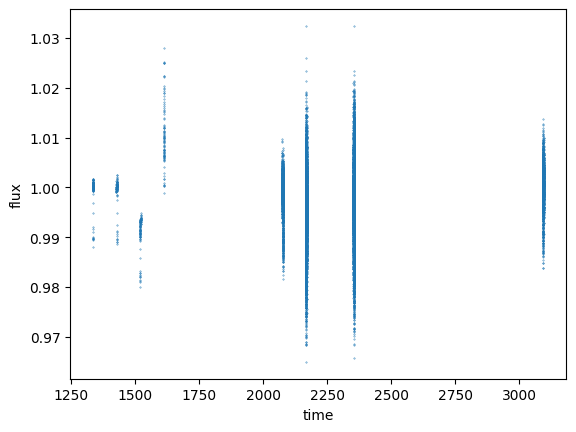

In [6]:
# Plot the data
df.plot(x='time', y='flux', kind='scatter', s=0.1)


<Axes: xlabel='time', ylabel='flux'>

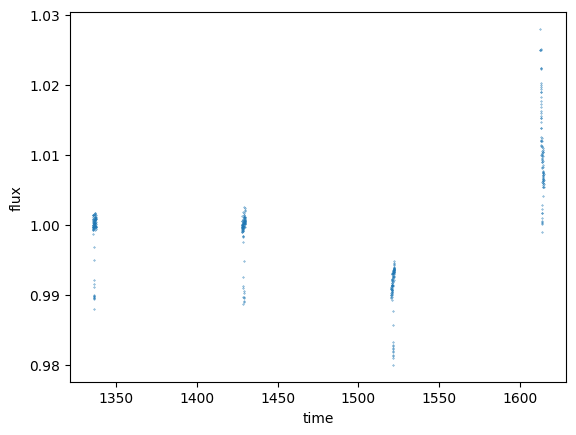

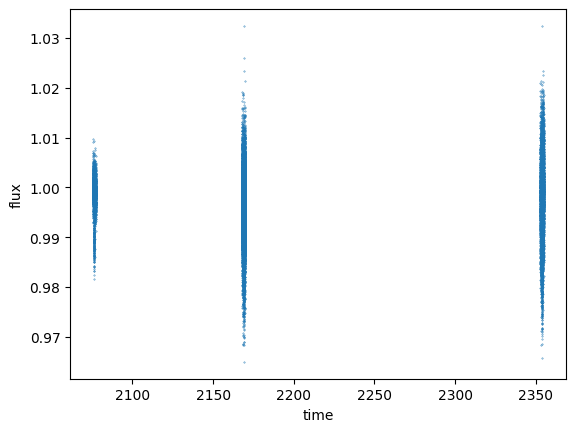

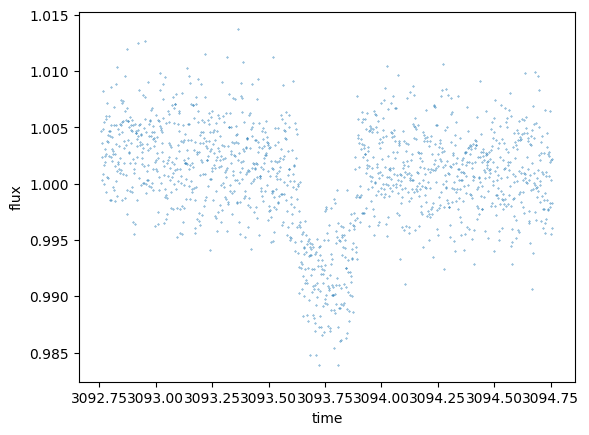

In [8]:
# Separate the data in 3 parts: before 1750, between, and after 2750
df1 = df[df['time'] < 1750]
df2 = df[(df['time'] >= 1750) & (df['time'] <= 2750)]
df3 = df[df['time'] > 2750]

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)


In [9]:
# Save the three dataframe files as csv with names 4409-tess-lightcurves-1800s, 600s, and 180s
df1.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-1800s.csv', index=False)
df2.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-600s.csv', index=False)
df3.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-180s.csv', index=False)


In [10]:
# Modify each csv file so that the first row is commented with # in the beginning
for filename in ['4409-tess-lightcurves-1800s.csv', '4409-tess-lightcurves-600s.csv', '4409-tess-lightcurves-180s.csv']:
    with open('../data/tess-stitched/raw/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/tess-stitched/raw/' + filename, 'w') as f:
        f.writelines(lines)

In [13]:
# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-1800s.csv')
df2 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-600s.csv')
df3 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-180s.csv')

# In memory, name the colums as if the first line was not commented
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')


In [17]:
# Convert the data into allesfitter-compliant format
import pandas as pd

def convert_to_scientific_notation(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Apply scientific notation with 18 digits after the decimal to each column
    for col in df.columns:
        # Check if the column is of a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: format(x, '.18e'))

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df


df_formatted = convert_to_scientific_notation(df1)


In [18]:
# Print the first 5 rows of the DataFrame
df_formatted.head()

,time,flux,flux_err
0,1.335427156297955662e+03,1.000000000000000000e+00,6.928035198786999587e-04
1,1.335447989991616623e+03,9.995062641602320275e-01,6.925134161999999894e-04
2,1.335468823685102052e+03,9.986788521063427737e-01,6.923356933784999929e-04
3,1.335489657378354877e+03,9.994022441459066153e-01,6.923162921229999468e-04
4,1.335510491071434217e+03,1.001408924542382506e+00,6.923965205850999465e-04


In [19]:
# For each of the above 3 files, save the DataFrame as a csv file, with the first line commented with #, and the rest of the lines in scientific notation, in the directory ../data/tess-stitched/allesfitter_converted
convert_to_scientific_notation(df1).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s.csv', index=False)
convert_to_scientific_notation(df2).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s.csv', index=False)
convert_to_scientific_notation(df3).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s.csv', index=False)

# Comment with # the first line of each of the above 3 files
for filename in ['4409-tess-lightcurves-1800s.csv', '4409-tess-lightcurves-600s.csv', '4409-tess-lightcurves-180s.csv']:
    with open('../data/tess-stitched/allesfitter_converted/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/tess-stitched/allesfitter_converted/' + filename, 'w') as f:
        f.writelines(lines)
